Getting the filtered data

In [17]:
import sys  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import os
import pandas_ta as ta

# Ensure the directories are in the system path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Data_Management')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Universe_Selection')))

# Import the modules
from data import Data
from coarse import Coarse_1 as Coarse
from fine import Fine_1 as Fine
from calculations import Calculations

In [18]:
#Get the data
symbols = ['BTCUSDT', 'ETHUSDT']
interval = '1d'
start_time = dt.datetime(2021, 1, 1)
end_time = dt.datetime(2021, 2, 10)

data = Data(symbols, interval, start_time, end_time).df

In [19]:
#Perform coarse analysis and filtering
coarse = Coarse()

In [41]:
df = coarse.volume_flag(data, 1000)
df

close  creturns      high  log_return  \
date                coin                                                
2020-12-31 19:00:00 BTCUSDT  29331.69       NaN  29600.00         NaN   
                    ETHUSDT    728.91       NaN    749.00         NaN   
2021-01-01 19:00:00 BTCUSDT  32178.33  1.101915  33300.00    0.092625   
                    ETHUSDT    774.56  1.064630    787.69    0.060745   
2021-01-02 19:00:00 BTCUSDT  33000.05  1.130417  34778.11    0.025216   
...                               ...       ...       ...         ...   
2021-02-06 19:00:00 ETHUSDT   1611.62  2.506235   1693.00   -0.039379   
2021-02-07 19:00:00 BTCUSDT  46374.87  1.691221  46794.45    0.178449   
                    ETHUSDT   1750.15  2.731194   1775.57    0.082462   
2021-02-08 19:00:00 BTCUSDT  46420.42  1.692883  48142.19    0.000982   
                    ETHUSDT   1769.13  2.760974   1821.88    0.010786   

                                  low      open   returns        volume  \
date                coin                                                  
2020-12-31 19:00:00 BTCUSDT  28624.57  28923.63       NaN  5.418293e+04   
                    ETHUSDT    714.29    736.42       NaN  6.751141e+05   
2021-01-01 19:00:00 BTCUSDT  28946.53  29331.70  0.097050  1.299939e+05   
                    ETHUSDT    714.91    728.91  0.062628  1.352619e+06   
2021-01-02 19:00:00 BTCUSDT  31962.99  32176.45  0.025536  1.209576e+05   
...                               ...       ...       ...           ...   
2021-02-06 19:00:00 ETHUSDT   1490.46   1676.35 -0.038614  1.281735e+06   
2021-02-07 19:00:00 BTCUSDT  37988.89  38795.69  0.195361  1.385975e+05   
                    ETHUSDT   1563.89   1611.46  0.085957  1.339777e+06   
2021-02-08 19:00:00 BTCUSDT  44961.09  46374.86  0.000982  1.154999e+05   
                    ETHUSDT   1708.49   1749.68  0.010845  1.185072e+06   

                             volume_in_dollars  volume_flag  
date                coin                                     
2020-12-31 19:00:00 BTCUSDT       1.589277e+09            1  
                    ETHUSDT       4.920974e+08            1  
2021-01-01 19:00:00 BTCUSDT       4.182986e+09            1  
                    ETHUSDT       1.047684e+09            1  
2021-01-02 19:00:00 BTCUSDT       3.991606e+09            1  
...                                        ...          ...  
2021-02-06 19:00:00 ETHUSDT       2.065670e+09            1  
2021-02-07 19:00:00 BTCUSDT       6.427443e+09            1  
                    ETHUSDT       2.344811e+09            1  
2021-02-08 19:00:00 BTCUSDT       5.361552e+09            1  
                    ETHUSDT       2.096546e+09            1  

[80 rows x 10 columns]

In [42]:
df = coarse.sort_by_volume(df)
df

close  creturns      high  log_return  \
date                coin                                                
2020-12-31 19:00:00 ETHUSDT    728.91       NaN    749.00         NaN   
                    BTCUSDT  29331.69       NaN  29600.00         NaN   
2021-01-01 19:00:00 ETHUSDT    774.56  1.064630    787.69    0.060745   
                    BTCUSDT  32178.33  1.101915  33300.00    0.092625   
2021-01-02 19:00:00 ETHUSDT    978.28  1.384919   1011.07    0.233501   
...                               ...       ...       ...         ...   
2021-02-06 19:00:00 BTCUSDT  38795.69  1.391093  39700.00   -0.010034   
2021-02-07 19:00:00 ETHUSDT   1750.15  2.731194   1775.57    0.082462   
                    BTCUSDT  46374.87  1.691221  46794.45    0.178449   
2021-02-08 19:00:00 ETHUSDT   1769.13  2.760974   1821.88    0.010786   
                    BTCUSDT  46420.42  1.692883  48142.19    0.000982   

                                  low      open   returns        volume  \
date                coin                                                  
2020-12-31 19:00:00 ETHUSDT    714.29    736.42       NaN  6.751141e+05   
                    BTCUSDT  28624.57  28923.63       NaN  5.418293e+04   
2021-01-01 19:00:00 ETHUSDT    714.91    728.91  0.062628  1.352619e+06   
                    BTCUSDT  28946.53  29331.70  0.097050  1.299939e+05   
2021-01-02 19:00:00 ETHUSDT    768.71    774.44  0.263014  2.813604e+06   
...                               ...       ...       ...           ...   
2021-02-06 19:00:00 BTCUSDT  37351.00  39181.01 -0.009984  8.436368e+04   
2021-02-07 19:00:00 ETHUSDT   1563.89   1611.46  0.085957  1.339777e+06   
                    BTCUSDT  37988.89  38795.69  0.195361  1.385975e+05   
2021-02-08 19:00:00 ETHUSDT   1708.49   1749.68  0.010845  1.185072e+06   
                    BTCUSDT  44961.09  46374.86  0.000982  1.154999e+05   

                             volume_in_dollars  volume_flag  
date                coin                                     
2020-12-31 19:00:00 ETHUSDT       4.920974e+08            1  
                    BTCUSDT       1.589277e+09            1  
2021-01-01 19:00:00 ETHUSDT       1.047684e+09            1  
                    BTCUSDT       4.182986e+09            1  
2021-01-02 19:00:00 ETHUSDT       2.752492e+09            1  
...                                        ...          ...  
2021-02-06 19:00:00 BTCUSDT       3.272947e+09            1  
2021-02-07 19:00:00 ETHUSDT       2.344811e+09            1  
                    BTCUSDT       6.427443e+09            1  
2021-02-08 19:00:00 ETHUSDT       2.096546e+09            1  
                    BTCUSDT       5.361552e+09            1  

[80 rows x 10 columns]

In [ ]:
df = coarse.sort_by_std(df, 2, 2)
df.head()

,,close,creturns,high,log_return,low,open,returns,volume,volume_in_dollars,volume_flag,std_values
date,coin,,,,,,,,,,,
2020-12-31 19:00:00,BTCUSDT,29331.69,NaN,29600.00,NaN,28624.57,28923.63,NaN,5.418293e+04,1.589277e+09,1,NaN
2021-01-01 19:00:00,BTCUSDT,32178.33,1.101915,33300.00,0.092625,28946.53,29331.70,0.097050,1.299939e+05,4.182986e+09,1,0.065449
2021-01-02 19:00:00,ETHUSDT,978.28,1.384919,1011.07,0.233501,768.71,774.44,0.263014,2.813604e+06,2.752492e+09,1,0.164364
2021-01-03 19:00:00,ETHUSDT,1041.43,1.477267,1162.97,0.062554,890.00,978.33,0.064552,4.245011e+06,4.420882e+09,1,0.044218
2021-01-04 19:00:00,BTCUSDT,33949.53,1.165601,34360.00,0.059492,29900.00,31989.75,0.061297,1.160500e+05,3.939843e+09,1,0.042055


In [44]:
df.unstack().head()

close           creturns               high           \
coin                  BTCUSDT  ETHUSDT   BTCUSDT   ETHUSDT  BTCUSDT  ETHUSDT   
date                                                                           
2020-12-31 19:00:00  29331.69      NaN       NaN       NaN  29600.0      NaN   
2021-01-01 19:00:00  32178.33      NaN  1.101915       NaN  33300.0      NaN   
2021-01-02 19:00:00       NaN   978.28       NaN  1.384919      NaN  1011.07   
2021-01-03 19:00:00       NaN  1041.43       NaN  1.477267      NaN  1162.97   
2021-01-04 19:00:00  33949.53      NaN  1.165601       NaN  34360.0      NaN   

                    log_return                 low          ...   returns  \
coin                   BTCUSDT   ETHUSDT   BTCUSDT ETHUSDT  ...   BTCUSDT   
date                                                        ...             
2020-12-31 19:00:00        NaN       NaN  28624.57     NaN  ...       NaN   
2021-01-01 19:00:00   0.092625       NaN  28946.53     NaN  ...  0.097050   
2021-01-02 19:00:00        NaN  0.233501       NaN  768.71  ...       NaN   
2021-01-03 19:00:00        NaN  0.062554       NaN  890.00  ...       NaN   
2021-01-04 19:00:00   0.059492       NaN  29900.00     NaN  ...  0.061297   

                                      volume               volume_in_dollars  \
coin                  ETHUSDT        BTCUSDT       ETHUSDT           BTCUSDT   
date                                                                           
2020-12-31 19:00:00       NaN   54182.925011           NaN      1.589277e+09   
2021-01-01 19:00:00       NaN  129993.873362           NaN      4.182986e+09   
2021-01-02 19:00:00  0.263014            NaN  2.813604e+06               NaN   
2021-01-03 19:00:00  0.064552            NaN  4.245011e+06               NaN   
2021-01-04 19:00:00       NaN  116049.997038           NaN      3.939843e+09   

                                  volume_flag         std_values            
coin                      ETHUSDT     BTCUSDT ETHUSDT    BTCUSDT   ETHUSDT  
date                                                                        
2020-12-31 19:00:00           NaN         1.0     NaN        NaN       NaN  
2021-01-01 19:00:00           NaN         1.0     NaN   0.065449       NaN  
2021-01-02 19:00:00  2.752492e+09         NaN     1.0        NaN  0.164364  
2021-01-03 19:00:00  4.420882e+09         NaN     1.0        NaN  0.044218  
2021-01-04 19:00:00           NaN         1.0     NaN   0.042055       NaN  

[5 rows x 22 columns]

In [45]:
fine = Fine()

In [ ]:
df = fine.above_ema(df, 2)

In [48]:
_df = df
_df

close  creturns      high  log_return  \
date                coin                                                
2020-12-31 19:00:00 BTCUSDT  29331.69       NaN  29600.00         NaN   
                    ETHUSDT       NaN       NaN       NaN         NaN   
2021-01-01 19:00:00 BTCUSDT  32178.33  1.101915  33300.00    0.092625   
                    ETHUSDT       NaN       NaN       NaN         NaN   
2021-01-02 19:00:00 BTCUSDT       NaN       NaN       NaN         NaN   
...                               ...       ...       ...         ...   
2021-02-06 19:00:00 ETHUSDT   1611.62  2.506235   1693.00   -0.039379   
2021-02-07 19:00:00 BTCUSDT  46374.87  1.691221  46794.45    0.178449   
                    ETHUSDT       NaN       NaN       NaN         NaN   
2021-02-08 19:00:00 BTCUSDT       NaN       NaN       NaN         NaN   
                    ETHUSDT   1769.13  2.760974   1821.88    0.010786   

                                  low      open   returns        volume  \
date                coin                                                  
2020-12-31 19:00:00 BTCUSDT  28624.57  28923.63       NaN  5.418293e+04   
                    ETHUSDT       NaN       NaN       NaN           NaN   
2021-01-01 19:00:00 BTCUSDT  28946.53  29331.70  0.097050  1.299939e+05   
                    ETHUSDT       NaN       NaN       NaN           NaN   
2021-01-02 19:00:00 BTCUSDT       NaN       NaN       NaN           NaN   
...                               ...       ...       ...           ...   
2021-02-06 19:00:00 ETHUSDT   1490.46   1676.35 -0.038614  1.281735e+06   
2021-02-07 19:00:00 BTCUSDT  37988.89  38795.69  0.195361  1.385975e+05   
                    ETHUSDT       NaN       NaN       NaN           NaN   
2021-02-08 19:00:00 BTCUSDT       NaN       NaN       NaN           NaN   
                    ETHUSDT   1708.49   1749.68  0.010845  1.185072e+06   

                             volume_in_dollars  volume_flag  std_values  \
date                coin                                                  
2020-12-31 19:00:00 BTCUSDT       1.589277e+09          1.0         NaN   
                    ETHUSDT                NaN          NaN         NaN   
2021-01-01 19:00:00 BTCUSDT       4.182986e+09          1.0    0.065449   
                    ETHUSDT                NaN          NaN         NaN   
2021-01-02 19:00:00 BTCUSDT                NaN          NaN         NaN   
...                                        ...          ...         ...   
2021-02-06 19:00:00 ETHUSDT       2.065670e+09          1.0    0.027842   
2021-02-07 19:00:00 BTCUSDT       6.427443e+09          1.0    0.125848   
                    ETHUSDT                NaN          NaN         NaN   
2021-02-08 19:00:00 BTCUSDT                NaN          NaN         NaN   
                    ETHUSDT       2.096546e+09          1.0    0.007627   

                                    ema_2  above_ema  
date                coin                              
2020-12-31 19:00:00 BTCUSDT           NaN          0  
                    ETHUSDT           NaN          0  
2021-01-01 19:00:00 BTCUSDT  30755.010000          1  
                    ETHUSDT    751.735000          0  
2021-01-02 19:00:00 BTCUSDT  32251.703333          0  
...                                   ...        ...  
2021-02-06 19:00:00 ETHUSDT   1633.395266          0  
2021-02-07 19:00:00 BTCUSDT  43840.978333          1  
                    ETHUSDT   1711.231755          0  
2021-02-08 19:00:00 BTCUSDT  45560.606111          0  
                    ETHUSDT   1749.830585          1  

[80 rows x 13 columns]

---

## Entry Signal: Trend Following

### SuperTrend

In [27]:

df = df.unstack()
df.head(2)

close          creturns             high          \
coin                  BTCUSDT ETHUSDT   BTCUSDT ETHUSDT  BTCUSDT ETHUSDT   
date                                                                       
2020-12-31 19:00:00  29331.69     NaN       NaN     NaN  29600.0     NaN   
2021-01-01 19:00:00  32178.33     NaN  1.101915     NaN  33300.0     NaN   

                    log_return               low          ...  \
coin                   BTCUSDT ETHUSDT   BTCUSDT ETHUSDT  ...   
date                                                      ...   
2020-12-31 19:00:00        NaN     NaN  28624.57     NaN  ...   
2021-01-01 19:00:00   0.092625     NaN  28946.53     NaN  ...   

                    volume_in_dollars         volume_flag         std_values  \
coin                          BTCUSDT ETHUSDT     BTCUSDT ETHUSDT    BTCUSDT   
date                                                                           
2020-12-31 19:00:00      1.589277e+09     NaN         1.0     NaN        NaN   
2021-01-01 19:00:00      4.182986e+09     NaN         1.0     NaN   0.065449   

                                ema_2          above_ema          
coin                ETHUSDT   BTCUSDT  ETHUSDT   BTCUSDT ETHUSDT  
date                                                              
2020-12-31 19:00:00     NaN       NaN      NaN         0       0  
2021-01-01 19:00:00     NaN  30755.01  751.735         1       0  

[2 rows x 26 columns]

In [28]:
for coin in df.columns.levels[1]:
    print(coin)

BTCUSDT
ETHUSDT


In [29]:
str_length = 7
str_multiplier = 3

supertrend_results = {}
# Iterate through each coin
for coin in df.columns.levels[1]:  # Get unique coin names
    # Extract high, low, close for the coin
    high, low, close = df["high", coin], df["low", coin], df["close", coin]

    # Calculate Supertrend
    supertrend = ta.supertrend(high, low, close)

    supertrend_results[coin] = supertrend



In [30]:
supertrend_df = pd.concat(supertrend_results, axis=1)
supertrend_df.head()

BTCUSDT                                            \
                    SUPERT_7_3.0 SUPERTd_7_3.0 SUPERTl_7_3.0 SUPERTs_7_3.0   
date                                                                         
2020-12-31 19:00:00          0.0             1           NaN           NaN   
2021-01-01 19:00:00          NaN             1           NaN           NaN   
2021-01-02 19:00:00          NaN             1           NaN           NaN   
2021-01-03 19:00:00          NaN             1           NaN           NaN   
2021-01-04 19:00:00          NaN             1           NaN           NaN   

                         ETHUSDT                                            
                    SUPERT_7_3.0 SUPERTd_7_3.0 SUPERTl_7_3.0 SUPERTs_7_3.0  
date                                                                        
2020-12-31 19:00:00          0.0             1           NaN           NaN  
2021-01-01 19:00:00          NaN             1           NaN           NaN  
2021-01-02 19:00:00          NaN             1           NaN           NaN  
2021-01-03 19:00:00          NaN             1           NaN           NaN  
2021-01-04 19:00:00          NaN             1           NaN           NaN

In [31]:
# Identify the last main column
last_main_column = supertrend_df.columns.levels[0][-1]
supertrend_df[last_main_column].head(2)

,SUPERT_7_3.0,SUPERTd_7_3.0,SUPERTl_7_3.0,SUPERTs_7_3.0
date,,,,
2020-12-31 19:00:00,0.0,1,NaN,NaN
2021-01-01 19:00:00,NaN,1,NaN,NaN


In [32]:
# supertrend_df.drop(columns=last_main_column, level=0, inplace = True)

In [33]:
supertrend_df.head(2)

BTCUSDT                                            \
                    SUPERT_7_3.0 SUPERTd_7_3.0 SUPERTl_7_3.0 SUPERTs_7_3.0   
date                                                                         
2020-12-31 19:00:00          0.0             1           NaN           NaN   
2021-01-01 19:00:00          NaN             1           NaN           NaN   

                         ETHUSDT                                            
                    SUPERT_7_3.0 SUPERTd_7_3.0 SUPERTl_7_3.0 SUPERTs_7_3.0  
date                                                                        
2020-12-31 19:00:00          0.0             1           NaN           NaN  
2021-01-01 19:00:00          NaN             1           NaN           NaN

In [34]:
supertrend_df = supertrend_df.swaplevel(axis=1).sort_index(axis=1)
supertrend_df.head(2)

SUPERT_7_3.0         SUPERTd_7_3.0         SUPERTl_7_3.0  \
                         BTCUSDT ETHUSDT       BTCUSDT ETHUSDT       BTCUSDT   
date                                                                           
2020-12-31 19:00:00          0.0     0.0             1       1           NaN   
2021-01-01 19:00:00          NaN     NaN             1       1           NaN   

                            SUPERTs_7_3.0          
                    ETHUSDT       BTCUSDT ETHUSDT  
date                                               
2020-12-31 19:00:00     NaN           NaN     NaN  
2021-01-01 19:00:00     NaN           NaN     NaN

In [35]:
final_df = pd.concat([df, supertrend_df], axis = 1)

In [36]:
final_df.head(2)

close          creturns             high          \
                      BTCUSDT ETHUSDT   BTCUSDT ETHUSDT  BTCUSDT ETHUSDT   
date                                                                       
2020-12-31 19:00:00  29331.69     NaN       NaN     NaN  29600.0     NaN   
2021-01-01 19:00:00  32178.33     NaN  1.101915     NaN  33300.0     NaN   

                    log_return               low          ... above_ema  \
                       BTCUSDT ETHUSDT   BTCUSDT ETHUSDT  ...   BTCUSDT   
date                                                      ...             
2020-12-31 19:00:00        NaN     NaN  28624.57     NaN  ...         0   
2021-01-01 19:00:00   0.092625     NaN  28946.53     NaN  ...         1   

                            SUPERT_7_3.0         SUPERTd_7_3.0          \
                    ETHUSDT      BTCUSDT ETHUSDT       BTCUSDT ETHUSDT   
date                                                                     
2020-12-31 19:00:00       0          0.0     0.0             1       1   
2021-01-01 19:00:00       0          NaN     NaN             1       1   

                    SUPERTl_7_3.0         SUPERTs_7_3.0          
                          BTCUSDT ETHUSDT       BTCUSDT ETHUSDT  
date                                                             
2020-12-31 19:00:00           NaN     NaN           NaN     NaN  
2021-01-01 19:00:00           NaN     NaN           NaN     NaN  

[2 rows x 34 columns]

In [37]:
#Now to make a trade and a position column
df = final_df
df = df.stack(future_stack = True)
df

close  creturns      high  log_return  \
date                                                                    
2020-12-31 19:00:00 BTCUSDT  29331.69       NaN  29600.00         NaN   
                    ETHUSDT       NaN       NaN       NaN         NaN   
2021-01-01 19:00:00 BTCUSDT  32178.33  1.101915  33300.00    0.092625   
                    ETHUSDT       NaN       NaN       NaN         NaN   
2021-01-02 19:00:00 BTCUSDT       NaN       NaN       NaN         NaN   
...                               ...       ...       ...         ...   
2021-02-06 19:00:00 ETHUSDT   1611.62  2.506235   1693.00   -0.039379   
2021-02-07 19:00:00 BTCUSDT  46374.87  1.691221  46794.45    0.178449   
                    ETHUSDT       NaN       NaN       NaN         NaN   
2021-02-08 19:00:00 BTCUSDT       NaN       NaN       NaN         NaN   
                    ETHUSDT   1769.13  2.760974   1821.88    0.010786   

                                  low      open   returns        volume  \
date                                                                      
2020-12-31 19:00:00 BTCUSDT  28624.57  28923.63       NaN  5.418293e+04   
                    ETHUSDT       NaN       NaN       NaN           NaN   
2021-01-01 19:00:00 BTCUSDT  28946.53  29331.70  0.097050  1.299939e+05   
                    ETHUSDT       NaN       NaN       NaN           NaN   
2021-01-02 19:00:00 BTCUSDT       NaN       NaN       NaN           NaN   
...                               ...       ...       ...           ...   
2021-02-06 19:00:00 ETHUSDT   1490.46   1676.35 -0.038614  1.281735e+06   
2021-02-07 19:00:00 BTCUSDT  37988.89  38795.69  0.195361  1.385975e+05   
                    ETHUSDT       NaN       NaN       NaN           NaN   
2021-02-08 19:00:00 BTCUSDT       NaN       NaN       NaN           NaN   
                    ETHUSDT   1708.49   1749.68  0.010845  1.185072e+06   

                             volume_in_dollars  volume_flag  std_values  \
date                                                                      
2020-12-31 19:00:00 BTCUSDT       1.589277e+09          1.0         NaN   
                    ETHUSDT                NaN          NaN         NaN   
2021-01-01 19:00:00 BTCUSDT       4.182986e+09          1.0    0.065449   
                    ETHUSDT                NaN          NaN         NaN   
2021-01-02 19:00:00 BTCUSDT                NaN          NaN         NaN   
...                                        ...          ...         ...   
2021-02-06 19:00:00 ETHUSDT       2.065670e+09          1.0    0.027842   
2021-02-07 19:00:00 BTCUSDT       6.427443e+09          1.0    0.125848   
                    ETHUSDT                NaN          NaN         NaN   
2021-02-08 19:00:00 BTCUSDT                NaN          NaN         NaN   
                    ETHUSDT       2.096546e+09          1.0    0.007627   

                                    ema_2  above_ema  SUPERT_7_3.0  \
date                                                                 
2020-12-31 19:00:00 BTCUSDT           NaN          0      0.000000   
                    ETHUSDT           NaN          0      0.000000   
2021-01-01 19:00:00 BTCUSDT  30755.010000          1           NaN   
                    ETHUSDT    751.735000          0           NaN   
2021-01-02 19:00:00 BTCUSDT  32251.703333          0           NaN   
...                                   ...        ...           ...   
2021-02-06 19:00:00 ETHUSDT   1633.395266          0   1261.066181   
2021-02-07 19:00:00 BTCUSDT  43840.978333          1  21132.337539   
                    ETHUSDT   1711.231755          0           NaN   
2021-02-08 19:00:00 BTCUSDT  45560.606111          0           NaN   
                    ETHUSDT   1749.830585          1   1326.500579   

                             SUPERTd_7_3.0  SUPERTl_7_3.0  SUPERTs_7_3.0  
date                                                                      
2020-12-31 19:00:00 BTCUSDT              1            NaN            

In [38]:
final_df.columns.levels[1]

Index(['BTCUSDT', 'ETHUSDT'], dtype='object')

Putting everything together into one function

In [50]:
def supertrend_signals(data, df, length = 7, multiplier = 3):
    df, data = df.copy().unstack(), data.copy().unstack()

    supertrend_results = {}
    # Iterate through each coin
    for coin in data.columns.get_level_values(1).unique():  # Get unique coin names
        # Extract high, low, close for the coin
        high, low, close = data["high", coin], data["low", coin], data["close", coin]

        # Calculate Supertrend
        supertrend = ta.supertrend(high, low, close, length, multiplier)

        supertrend_results[coin] = supertrend

    # Create a dataframe from the results
    supertrend_df = pd.concat(supertrend_results, axis=1)
    supertrend_df = supertrend_df.swaplevel(axis=1).sort_index(axis=1)

    final_df = pd.concat([df, supertrend_df], axis = 1)

    # Stack the dataframe and get position and trades columns
    df = final_df.stack(future_stack=True)

    return df

In [51]:
supertrend_signals(data, _df, 7, 3)

close  creturns      high  log_return  \
date                                                                    
2020-12-31 19:00:00 BTCUSDT  29331.69       NaN  29600.00         NaN   
                    ETHUSDT       NaN       NaN       NaN         NaN   
2021-01-01 19:00:00 BTCUSDT  32178.33  1.101915  33300.00    0.092625   
                    ETHUSDT       NaN       NaN       NaN         NaN   
2021-01-02 19:00:00 BTCUSDT       NaN       NaN       NaN         NaN   
...                               ...       ...       ...         ...   
2021-02-06 19:00:00 ETHUSDT   1611.62  2.506235   1693.00   -0.039379   
2021-02-07 19:00:00 BTCUSDT  46374.87  1.691221  46794.45    0.178449   
                    ETHUSDT       NaN       NaN       NaN         NaN   
2021-02-08 19:00:00 BTCUSDT       NaN       NaN       NaN         NaN   
                    ETHUSDT   1769.13  2.760974   1821.88    0.010786   

                                  low      open   returns        volume  \
date                                                                      
2020-12-31 19:00:00 BTCUSDT  28624.57  28923.63       NaN  5.418293e+04   
                    ETHUSDT       NaN       NaN       NaN           NaN   
2021-01-01 19:00:00 BTCUSDT  28946.53  29331.70  0.097050  1.299939e+05   
                    ETHUSDT       NaN       NaN       NaN           NaN   
2021-01-02 19:00:00 BTCUSDT       NaN       NaN       NaN           NaN   
...                               ...       ...       ...           ...   
2021-02-06 19:00:00 ETHUSDT   1490.46   1676.35 -0.038614  1.281735e+06   
2021-02-07 19:00:00 BTCUSDT  37988.89  38795.69  0.195361  1.385975e+05   
                    ETHUSDT       NaN       NaN       NaN           NaN   
2021-02-08 19:00:00 BTCUSDT       NaN       NaN       NaN           NaN   
                    ETHUSDT   1708.49   1749.68  0.010845  1.185072e+06   

                             volume_in_dollars  volume_flag  std_values  \
date                                                                      
2020-12-31 19:00:00 BTCUSDT       1.589277e+09          1.0         NaN   
                    ETHUSDT                NaN          NaN         NaN   
2021-01-01 19:00:00 BTCUSDT       4.182986e+09          1.0    0.065449   
                    ETHUSDT                NaN          NaN         NaN   
2021-01-02 19:00:00 BTCUSDT                NaN          NaN         NaN   
...                                        ...          ...         ...   
2021-02-06 19:00:00 ETHUSDT       2.065670e+09          1.0    0.027842   
2021-02-07 19:00:00 BTCUSDT       6.427443e+09          1.0    0.125848   
                    ETHUSDT                NaN          NaN         NaN   
2021-02-08 19:00:00 BTCUSDT                NaN          NaN         NaN   
                    ETHUSDT       2.096546e+09          1.0    0.007627   

                                    ema_2  above_ema  SUPERT_7_3.0  \
date                                                                 
2020-12-31 19:00:00 BTCUSDT           NaN          0      0.000000   
                    ETHUSDT           NaN          0      0.000000   
2021-01-01 19:00:00 BTCUSDT  30755.010000          1           NaN   
                    ETHUSDT    751.735000          0           NaN   
2021-01-02 19:00:00 BTCUSDT  32251.703333          0           NaN   
...                                   ...        ...           ...   
2021-02-06 19:00:00 ETHUSDT   1633.395266          0   1264.771759   
2021-02-07 19:00:00 BTCUSDT  43840.978333          1  31636.898057   
                    ETHUSDT   1711.231755          0   1264.771759   
2021-02-08 19:00:00 BTCUSDT  45560.606111          0  35970.360445   
                    ETHUSDT   1749.830585          1   1305.115010   

                             SUPERTd_7_3.0  SUPERTl_7_3.0  SUPERTs_7_3.0  
date                                                                      
2020-12-31 19:00:00 BTCUSDT              1            NaN            

---

## Entry Signal: Mean Reversion

### Last Day's Low

In [52]:
#First, reimport the data on 1h granularity
data = Data(symbols, '1h', start_time, end_time).df

In [53]:
start_time = data.index.levels[0][0].strftime('%Y-%m-%d')
end_time = data.index.levels[0][-1].strftime('%Y-%m-%d')
symbols = data.index.levels[1].unique()

In [54]:
data

close  creturns      high  log_return  \
date                coin                                                
2020-12-31 19:00:00 BTCUSDT  28995.13       NaN  29031.34         NaN   
                    ETHUSDT    734.07       NaN    739.00         NaN   
2020-12-31 20:00:00 BTCUSDT  29409.99  1.014411  29470.00    0.014207   
                    ETHUSDT    748.28  1.019546    749.00    0.019173   
2020-12-31 21:00:00 BTCUSDT  29194.65  1.007010  29465.26   -0.007349   
...                               ...       ...       ...         ...   
2021-02-09 16:00:00 ETHUSDT   1766.15  2.729451   1772.00    0.001570   
2021-02-09 17:00:00 BTCUSDT  46839.01  1.764461  47241.92   -0.008335   
                    ETHUSDT   1765.11  2.727844   1766.16   -0.000589   
2021-02-09 18:00:00 BTCUSDT  46420.42  1.748763  46860.00   -0.008977   
                    ETHUSDT   1769.13  2.734064   1778.64    0.002275   

                                  low      open   returns        volume  \
date                coin                                                  
2020-12-31 19:00:00 BTCUSDT  28690.17  28923.63       NaN   2311.811445   
                    ETHUSDT    729.33    736.42       NaN  27932.698840   
2020-12-31 20:00:00 BTCUSDT  28960.35  28995.13  0.014308   5403.068471   
                    ETHUSDT    733.37    734.08  0.019358  52336.187790   
2020-12-31 21:00:00 BTCUSDT  29120.03  29410.00 -0.007322   2384.231560   
...                               ...       ...       ...           ...   
2021-02-09 16:00:00 ETHUSDT   1757.94   1763.63  0.001571  30783.807110   
2021-02-09 17:00:00 BTCUSDT  46440.52  47241.92 -0.008300   2914.614311   
                    ETHUSDT   1750.21   1766.15 -0.000589  22947.153400   
2021-02-09 18:00:00 BTCUSDT  46201.37  46839.99 -0.008937   2790.416785   
                    ETHUSDT   1747.64   1765.11  0.002277  33999.388010   

                             volume_in_dollars  
date                coin                        
2020-12-31 19:00:00 BTCUSDT       6.703127e+07  
                    ETHUSDT       2.050456e+07  
2020-12-31 20:00:00 BTCUSDT       1.589042e+08  
                    ETHUSDT       3.916212e+07  
2020-12-31 21:00:00 BTCUSDT       6.960681e+07  
...                                        ...  
2021-02-09 16:00:00 ETHUSDT       5.436882e+07  
2021-02-09 17:00:00 BTCUSDT       1.365176e+08  
                    ETHUSDT       4.050425e+07  
2021-02-09 18:00:00 BTCUSDT       1.295323e+08  
                    ETHUSDT       6.014934e+07  

[1920 rows x 9 columns]

First we need to:
1. Get the daily data (notice that we need the start of the day to align with the crypto daily candle start time (at 0 AM UTC))
2. ffill all the values to the hourly dataframe
3. create a direction column check if the last close is lower than last day low and current close is higher than last day low\
make sure to not look for current close then future close (this is going to be forward looking)

In [55]:
data_daily = Data(symbols, '1d', start_time, end_time).df
data_daily = data_daily[['open', 'high', 'low', 'close']]
data_daily = data_daily.unstack().shift(3).stack()
data_daily.columns = [f'shifted_daily_{col}' for col in data_daily.columns]
data_daily


C:\Users\yassi\AppData\Local\Temp\ipykernel_58952\3393065946.py:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data_daily = data_daily.unstack().shift(3).stack()


shifted_daily_open  shifted_daily_high  \
date                coin                                              
2021-01-02 19:00:00 BTCUSDT            28875.55            29300.00   
                    ETHUSDT              752.17              755.74   
2021-01-03 19:00:00 BTCUSDT            28923.63            29600.00   
                    ETHUSDT              736.42              749.00   
2021-01-04 19:00:00 BTCUSDT            29331.70            33300.00   
...                                         ...                 ...   
2021-02-05 19:00:00 ETHUSDT             1511.93             1669.35   
2021-02-06 19:00:00 BTCUSDT            37620.26            38708.27   
                    ETHUSDT             1664.67             1695.20   
2021-02-07 19:00:00 BTCUSDT            36936.65            38310.12   
                    ETHUSDT             1595.53             1760.49   

                             shifted_daily_low  shifted_daily_close  
date                coin                                             
2021-01-02 19:00:00 BTCUSDT           27850.00             28923.63  
                    ETHUSDT             722.00               736.42  
2021-01-03 19:00:00 BTCUSDT           28624.57             29331.69  
                    ETHUSDT             714.29               728.91  
2021-01-04 19:00:00 BTCUSDT           28946.53             32178.33  
...                                        ...                  ...  
2021-02-05 19:00:00 ETHUSDT            1508.39              1664.49  
2021-02-06 19:00:00 BTCUSDT           36161.95             36936.66  
                    ETHUSDT            1554.44              1595.67  
2021-02-07 19:00:00 BTCUSDT           36570.00             38290.24  
                    ETHUSDT            1591.00              1719.19  

[74 rows x 4 columns]

In [56]:
data_daily_reindexed = data_daily.reindex(data.index)
data_daily_reindexed = data_daily_reindexed.unstack().ffill().stack(future_stack = True)
data_daily_reindexed.head(10)

shifted_daily_open  shifted_daily_high  \
date                coin                                              
2020-12-31 19:00:00 BTCUSDT                 NaN                 NaN   
                    ETHUSDT                 NaN                 NaN   
2020-12-31 20:00:00 BTCUSDT                 NaN                 NaN   
                    ETHUSDT                 NaN                 NaN   
2020-12-31 21:00:00 BTCUSDT                 NaN                 NaN   
                    ETHUSDT                 NaN                 NaN   
2020-12-31 22:00:00 BTCUSDT                 NaN                 NaN   
                    ETHUSDT                 NaN                 NaN   
2020-12-31 23:00:00 BTCUSDT                 NaN                 NaN   
                    ETHUSDT                 NaN                 NaN   

                             shifted_daily_low  shifted_daily_close  
date                coin                                             
2020-12-31 19:00:00 BTCUSDT                NaN                  NaN  
                    ETHUSDT                NaN                  NaN  
2020-12-31 20:00:00 BTCUSDT                NaN                  NaN  
                    ETHUSDT                NaN                  NaN  
2020-12-31 21:00:00 BTCUSDT                NaN                  NaN  
                    ETHUSDT                NaN                  NaN  
2020-12-31 22:00:00 BTCUSDT                NaN                  NaN  
                    ETHUSDT                NaN                  NaN  
2020-12-31 23:00:00 BTCUSDT                NaN                  NaN  
                    ETHUSDT                NaN                  NaN

In [57]:
df = pd.concat([data, data_daily_reindexed], axis = 1)
df.head()

close  creturns      high  log_return  \
date                coin                                                
2020-12-31 19:00:00 BTCUSDT  28995.13       NaN  29031.34         NaN   
                    ETHUSDT    734.07       NaN    739.00         NaN   
2020-12-31 20:00:00 BTCUSDT  29409.99  1.014411  29470.00    0.014207   
                    ETHUSDT    748.28  1.019546    749.00    0.019173   
2020-12-31 21:00:00 BTCUSDT  29194.65  1.007010  29465.26   -0.007349   

                                  low      open   returns        volume  \
date                coin                                                  
2020-12-31 19:00:00 BTCUSDT  28690.17  28923.63       NaN   2311.811445   
                    ETHUSDT    729.33    736.42       NaN  27932.698840   
2020-12-31 20:00:00 BTCUSDT  28960.35  28995.13  0.014308   5403.068471   
                    ETHUSDT    733.37    734.08  0.019358  52336.187790   
2020-12-31 21:00:00 BTCUSDT  29120.03  29410.00 -0.007322   2384.231560   

                             volume_in_dollars  shifted_daily_open  \
date                coin                                             
2020-12-31 19:00:00 BTCUSDT       6.703127e+07                 NaN   
                    ETHUSDT       2.050456e+07                 NaN   
2020-12-31 20:00:00 BTCUSDT       1.589042e+08                 NaN   
                    ETHUSDT       3.916212e+07                 NaN   
2020-12-31 21:00:00 BTCUSDT       6.960681e+07                 NaN   

                             shifted_daily_high  shifted_daily_low  \
date                coin                                             
2020-12-31 19:00:00 BTCUSDT                 NaN                NaN   
                    ETHUSDT                 NaN                NaN   
2020-12-31 20:00:00 BTCUSDT                 NaN                NaN   
                    ETHUSDT                 NaN                NaN   
2020-12-31 21:00:00 BTCUSDT                 NaN                NaN   

                             shifted_daily_close  
date                coin                          
2020-12-31 19:00:00 BTCUSDT                  NaN  
                    ETHUSDT                  NaN  
2020-12-31 20:00:00 BTCUSDT                  NaN  
                    ETHUSDT                  NaN  
2020-12-31 21:00:00 BTCUSDT                  NaN

---

The following is not going to be used, but for reference purposes

In [58]:
# Resample with specific aggregation for OHLCV
df_1 = data.dropna()
df_daily = df.groupby(level = -1).resample('D', level = 0).agg({
    'open': 'first',    # First value of the day
    'high': 'max',      # Maximum value of the day
    'low': 'min',       # Minimum value of the day
    'close': 'last',    # Last value of the day
    'volume': 'sum'     # Total volume of the day
})

In [59]:
df_daily.columns = [f'daily_{col}' for col in df_daily.columns]

In [60]:
df_daily = df_daily.reorder_levels([1, 0], axis = 0).sort_index(axis = 0)

In [61]:
df_daily

daily_open  daily_high  daily_low  daily_close  \
date       coin                                                      
2020-12-31 BTCUSDT    28923.63    29470.00   28690.17     29220.31   
           ETHUSDT      736.42      749.00     729.33       742.29   
2021-01-01 BTCUSDT    29220.31    29600.00   28624.57     29349.63   
           ETHUSDT      742.34      743.33     714.29       729.45   
2021-01-02 BTCUSDT    29349.63    33300.00   29349.63     33192.53   
...                        ...         ...        ...          ...   
2021-02-07 ETHUSDT     1608.02     1655.77    1490.46      1618.70   
2021-02-08 BTCUSDT    38584.92    47498.00   38440.68     46837.57   
           ETHUSDT     1618.61     1775.57    1605.31      1737.49   
2021-02-09 BTCUSDT    46837.57    48142.19   44961.09     46420.42   
           ETHUSDT     1737.40     1821.88    1712.19      1769.13   

                    daily_volume  
date       coin                   
2020-12-31 BTCUSDT  1.359850e+04  
           ETHUSDT  1.496874e+05  
2021-01-01 BTCUSDT  4.896616e+04  
           ETHUSDT  6.577288e+05  
2021-01-02 BTCUSDT  1.359385e+05  
...                          ...  
2021-02-07 ETHUSDT  1.198837e+06  
2021-02-08 BTCUSDT  1.560175e+05  
           ETHUSDT  1.361740e+06  
2021-02-09 BTCUSDT  8.492587e+04  
           ETHUSDT  9.657529e+05  

[82 rows x 5 columns]

---

In [62]:
#Now to generate a direction column:
# 1 if the close is above the daily close and last open is above the daily close and last close is below the daily close

#Before that, we need to make sure we are dealing with the same date when comparing the daily low with the hourly closes
#Temporarily unstack it
_df = df[[]].unstack() #We don't need any of the columns, just the index (removing them to make sure it runs faster)

# Extract the date part from the datetime index
_df['date_only'] = _df.index.date

# Shift the date column by one row
_df['previous_date'] = _df['date_only'].shift(1)

# Compare the current date with the previous date
_df['same_date'] = _df['date_only'] == _df['previous_date']


In [63]:
_df = _df.stack(future_stack = True)

In [64]:
_df

,,date_only,previous_date,same_date
date,coin,,,
2020-12-31 19:00:00,,2020-12-31,None,False
2020-12-31 20:00:00,,2020-12-31,2020-12-31,True
2020-12-31 21:00:00,,2020-12-31,2020-12-31,True
2020-12-31 22:00:00,,2020-12-31,2020-12-31,True
2020-12-31 23:00:00,,2020-12-31,2020-12-31,True
...,...,...,...,...
2021-02-09 14:00:00,,2021-02-09,2021-02-09,True
2021-02-09 15:00:00,,2021-02-09,2021-02-09,True
2021-02-09 16:00:00,,2021-02-09,2021-02-09,True


In [65]:
hourly_lookback = 1
df['last_days_low'] = _df['same_date'] & (df['open'].shift(hourly_lookback) > df['shifted_daily_low']) &\
(df['close'].shift(hourly_lookback) < df['shifted_daily_low']) & (df['close'] > df['shifted_daily_low']) &\
(df['close'].shift(hourly_lookback + 1) > df['shifted_daily_low']) #Ensures that price is pulling back to the daily low, and not going from below it to above it
df['last_days_low'] = df['last_days_low'].astype(int)

In [66]:
df['last_days_low']

date                 coin   
2020-12-31 19:00:00  BTCUSDT    0
                     ETHUSDT    0
2020-12-31 20:00:00  BTCUSDT    0
                     ETHUSDT    0
2020-12-31 21:00:00  BTCUSDT    0
                               ..
2021-02-09 16:00:00  ETHUSDT    0
2021-02-09 17:00:00  BTCUSDT    0
                     ETHUSDT    0
2021-02-09 18:00:00  BTCUSDT    0
                     ETHUSDT    0
Name: last_days_low, Length: 1920, dtype: int32

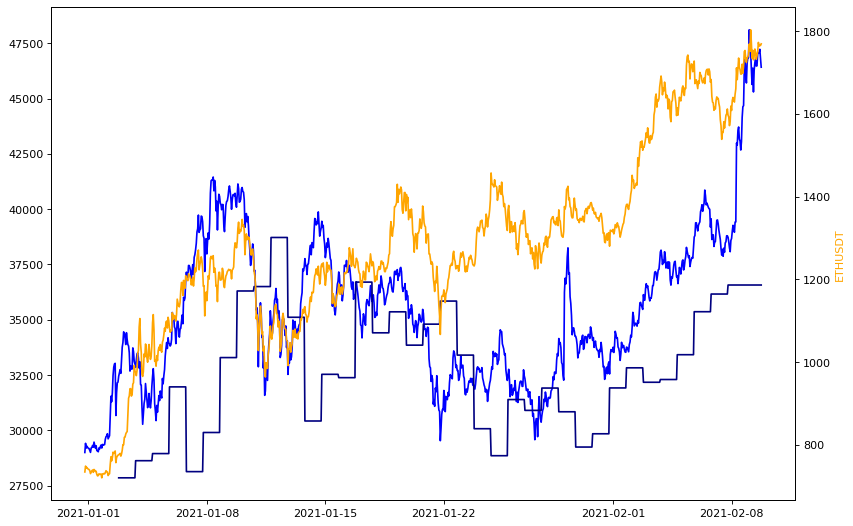

In [67]:
plt.figure(figsize = (12, 8), dpi = 80)
plt.plot(df.unstack()['close', 'BTCUSDT'], color = 'blue')
plt.plot(df.unstack()['shifted_daily_low', 'BTCUSDT'], color = 'navy')
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(df.unstack()['close', 'ETHUSDT'], color='orange')
ax2.set_ylabel('ETHUSDT', color='orange');

Putting Everything Together into one function

In [68]:
def last_days_low(df, hourly_lookback = 1, daily_lookback = 1):
    #Getting parameters
    start_time = df.index.levels[0][0].strftime('%Y-%m-%d')
    end_time = df.index.levels[0][-1].strftime('%Y-%m-%d')
    symbols = df.index.levels[1].unique()

    #Get the daily data and clean it
    df_daily = Data(symbols, '1d', start_time, end_time).df
    df_daily = df_daily[['open', 'high', 'low', 'close']]
    df_daily = df_daily.unstack().shift(daily_lookback).stack(future_stack = True)
    df_daily.columns = [f'shifted_daily_{col}' for col in df_daily.columns]

    #Reindex the daily data to match the hourly data
    df_daily_reindexed = df_daily.reindex(data.index)
    df_daily_reindexed = df_daily_reindexed.unstack().ffill().stack(future_stack = True)

    #Concatenate the dataframes
    df = pd.concat([df, df_daily_reindexed], axis = 1)

    #Now to generate a direction column:
    # 1 if the close is above the daily close and last open is above the daily close and last close is below the daily close, else 0

    #Before that, we need to make sure we are dealing with the same date when comparing the daily low with the hourly closes
    _df = df[[]].unstack() #We don't need any of the columns, just the index (removing them to make sure it runs faster)
    _df['date_only'] = _df.index.date # Extract the date part from the datetime index
    _df['previous_date'] = _df['date_only'].shift(1) # Shift the date column by one row
    _df['same_date'] = _df['date_only'] == _df['previous_date'] # Compare the current date with the previous date
    _df = _df.stack(future_stack = True)

    #Direction column
    df['last_days_low'] = _df['same_date'] & (df['open'].shift(hourly_lookback) > df['shifted_daily_low']) &\
      (df['close'].shift(hourly_lookback) < df['shifted_daily_low']) & (df['close'] > df['shifted_daily_low'])&\
      (df['close'].shift(hourly_lookback + 1) > df['shifted_daily_low']) #Ensures that price is pulling back to the daily low,
                                                                        #and not going from below it to above it
    df['last_days_low'] = df['last_days_low'].astype(int)

    return df


In [70]:
last_days_low(data, 1, 1)

close  creturns      high  log_return  \
date                coin                                                
2020-12-31 19:00:00 BTCUSDT  28995.13       NaN  29031.34         NaN   
                    ETHUSDT    734.07       NaN    739.00         NaN   
2020-12-31 20:00:00 BTCUSDT  29409.99  1.014411  29470.00    0.014207   
                    ETHUSDT    748.28  1.019546    749.00    0.019173   
2020-12-31 21:00:00 BTCUSDT  29194.65  1.007010  29465.26   -0.007349   
...                               ...       ...       ...         ...   
2021-02-09 16:00:00 ETHUSDT   1766.15  2.729451   1772.00    0.001570   
2021-02-09 17:00:00 BTCUSDT  46839.01  1.764461  47241.92   -0.008335   
                    ETHUSDT   1765.11  2.727844   1766.16   -0.000589   
2021-02-09 18:00:00 BTCUSDT  46420.42  1.748763  46860.00   -0.008977   
                    ETHUSDT   1769.13  2.734064   1778.64    0.002275   

                                  low      open   returns        volume  \
date                coin                                                  
2020-12-31 19:00:00 BTCUSDT  28690.17  28923.63       NaN   2311.811445   
                    ETHUSDT    729.33    736.42       NaN  27932.698840   
2020-12-31 20:00:00 BTCUSDT  28960.35  28995.13  0.014308   5403.068471   
                    ETHUSDT    733.37    734.08  0.019358  52336.187790   
2020-12-31 21:00:00 BTCUSDT  29120.03  29410.00 -0.007322   2384.231560   
...                               ...       ...       ...           ...   
2021-02-09 16:00:00 ETHUSDT   1757.94   1763.63  0.001571  30783.807110   
2021-02-09 17:00:00 BTCUSDT  46440.52  47241.92 -0.008300   2914.614311   
                    ETHUSDT   1750.21   1766.15 -0.000589  22947.153400   
2021-02-09 18:00:00 BTCUSDT  46201.37  46839.99 -0.008937   2790.416785   
                    ETHUSDT   1747.64   1765.11  0.002277  33999.388010   

                             volume_in_dollars  shifted_daily_open  \
date                coin                                             
2020-12-31 19:00:00 BTCUSDT       6.703127e+07            28875.55   
                    ETHUSDT       2.050456e+07              752.17   
2020-12-31 20:00:00 BTCUSDT       1.589042e+08            28875.55   
                    ETHUSDT       3.916212e+07              752.17   
2020-12-31 21:00:00 BTCUSDT       6.960681e+07            28875.55   
...                                        ...                 ...   
2021-02-09 16:00:00 ETHUSDT       5.436882e+07             1676.35   
2021-02-09 17:00:00 BTCUSDT       1.365176e+08            39181.01   
                    ETHUSDT       4.050425e+07             1676.35   
2021-02-09 18:00:00 BTCUSDT       1.295323e+08            39181.01   
                    ETHUSDT       6.014934e+07             1676.35   

                             shifted_daily_high  shifted_daily_low  \
date                coin                                             
2020-12-31 19:00:00 BTCUSDT            29300.00           27850.00   
                    ETHUSDT              755.74             722.00   
2020-12-31 20:00:00 BTCUSDT            29300.00           27850.00   
                    ETHUSDT              755.74             722.00   
2020-12-31 21:00:00 BTCUSDT            29300.00           27850.00   
...                                         ...                ...   
2021-02-09 16:00:00 ETHUSDT             1693.00            1490.46   
2021-02-09 17:00:00 BTCUSDT            39700.00           37351.00   
                    ETHUSDT             1693.00            1490.46   
2021-02-09 18:00:00 BTCUSDT            39700.00           37351.00   
                    ETHUSDT             1693.00            1490.46   

                             shifted_daily_close  last_days_low  
date                coin                                         
2020-12-31 19:00:00 BTCUSDT             28923.63              0  
                    ETHUSDT               736.42              0  
2020-12-31 20:00:00 